In [14]:
%pylab inline
from networkanalysis.networkanalysis import *
from networkanalysis.experiments import *
import networkanalysis
networkanalysis.__version__

Populating the interactive namespace from numpy and matplotlib


/Users/admin/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


u'0.3.4'

In [15]:
import seaborn as sbn

In [16]:
pG = PerturbationGraph()

In [17]:
pG.populate_pert_graph('summary_mbar.csv')

In [18]:
graph = pG.graph

In [19]:
print (np.sort(graph.nodes()))

['15' '16' '35' '36' '38' '39' '44' '45']


In [20]:
pG.compute_weighted_avg_paths('45')

In [21]:
ordered_keys = ['15', '16', '35', '36', '38', '39', '44', '45']

In [22]:
pG.format_free_energies(merge_BM=True,intermed_ID='INT', compound_order=ordered_keys)

In [23]:
stage2_DDG = pG.freeEnergyInKcal

In [24]:
stage2_DDG

[{'15': -0.71949638329644916, 'error': 0.65366064180637173},
 {'16': -0.1194963832964492, 'error': 0.65366064180637173},
 {'35': -1.7499792278117126, 'error': 0.7241433576167583},
 {'36': -2.4002921342318722, 'error': 0.72406962448234291},
 {'38': -1.3567402162062852, 'error': 0.66521862490934824},
 {'39': -1.6462274611524852, 'error': 0.72463037793507723},
 {'44': 1.3694735459522269, 'error': 0.19539200822925351},
 {'45': -0.0, 'error': 0.0}]

In [25]:
experiments = ExperimentalData()

In [26]:
experiments.compute_DDG_from_IC50s('IC_50s.csv','45')

In [27]:
exp_list = experiments.freeEnergiesInKcal

In [28]:
print exp_list

[{'15': -1.3727119612189949, 'error': 0.41322747573364904}, {'error': 0.41322747573364904, '16': -1.2640189176651957}, {'35': -3.0499583546178397, 'error': 0.41322747573364904}, {'36': -3.2916809321896854, 'error': 0.41322747573364904}, {'38': -1.0925140195033931, 'error': 0.41322747573364904}, {'39': -0.8030730828723609, 'error': 0.41322747573364904}, {'44': -0.13302953401804746, 'error': 0.41322747573364904}, {'45': 0.0, 'error': 0.41322747573364904}]


In [29]:
pG.write_free_energies(stage2_DDG,'DDG.csv')
pG.write_free_energies(exp_list,'DDG_exp.csv')

## Statistics

In [30]:
from networkanalysis.stats import *

In [31]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, exp_list, repeats=10000)

In [32]:
print "Experimental versus calculated statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Experimental versus calculated statistics
R : 0.64 < 0.69 < 0.76
MUE: 0.81 < 0.90 < 0.98
R^2: 0.41 < 0.49 < 0.58


In [33]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, stage2_DDG, repeats=10000)

In [34]:
print "Calculated versus calculated statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Calculated versus calculated statistics
R : 0.89 < 0.90 < 0.94
MUE: 0.36 < 0.43 < 0.49
R^2: 0.79 < 0.82 < 0.88


In [35]:
stats = freeEnergyStats()
stats.generate_statistics(exp_list, exp_list, repeats=10000)

In [36]:
print "Experimental versus experimental statistics"
print "R : %.2f < %.2f < %.2f" %(stats.R_error[0],stats.R,stats.R_error[1])
print "MUE: %.2f < %.2f < %.2f" %(stats.mue_error[0],stats.mue,stats.mue_error[1])
print "R^2: %.2f < %.2f < %.2f" %(stats.R2_error[0],stats.R2,stats.R2_error[1])

Experimental versus experimental statistics
R : 0.94 < 0.95 < 0.97
MUE: 0.29 < 0.33 < 0.37
R^2: 0.89 < 0.91 < 0.94


## Plotting

In [37]:
stats = freeEnergyStats()
stats.generate_statistics(stage2_DDG, exp_list, repeats=10000)

In [38]:
from networkanalysis.plotting import *

In [39]:
plot = FreeEnergyPlotter(exp_list,stage2_DDG,compound_list=ordered_keys)

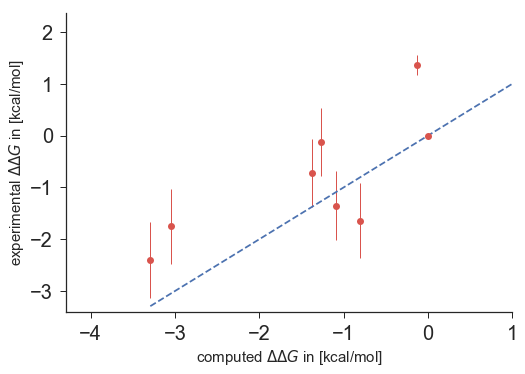

In [40]:
plot.plot_scatter_plot()

(<matplotlib.axes._subplots.AxesSubplot at 0x114da4450>,
 <matplotlib.figure.Figure at 0x111616d10>)

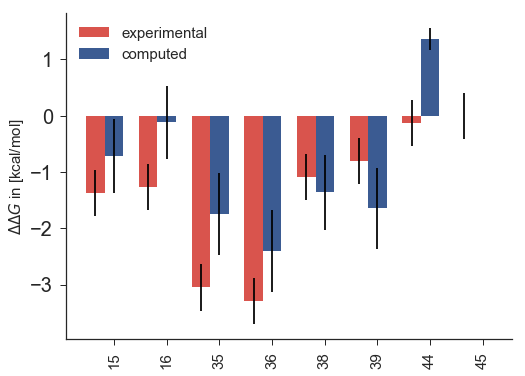

In [41]:
plot.plot_bar_plot()

In [42]:
scipy.stats.linregress(stats.data_exp,np.array(stats.data_comp)[:,0])

LinregressResult(slope=0.76340534297556817, intercept=0.22250428434132763, rvalue=0.76459209009768825, pvalue=0.027126853294954876, stderr=0.26271354150198212)

## Perturbation of experimental and computed results

In [44]:
def generate_perturbation(exp_ddg):
    new_exp_dic = []
    for dic in exp_ddg:
        keys = dic.keys()
        if keys[0]=='error':
            err = dic[keys[0]]
            val = dic[keys[1]]
            compound = keys[1]
        else:
            err = dic[keys[1]]
            val = dic[keys[0]]
            compound = keys[0]
        if err !=0.0:
            new_val = np.random.normal(val, err)
        else:
            new_val = val
        new_exp_dic.append({'error':err, compound : new_val})
    return new_exp_dic

In [45]:
def bootstrap_compounds(c_list, exp_data, sim_data):
    R = []
    mue = []
    rmsd = []
    for x in range(1000):
        indeces = np.random.randint(len(c_list), size=len(c_list))
        new_exp_list = []
        new_comp_list  = []
        for i in indeces:
            new_exp_list.append(exp_data[i])
            new_comp_list.append(sim_data[i])

        #exp_data = generate_new_exp_data(exp_data)
        new_exp_list = convert_to_array(new_exp_list)
        new_comp_list = convert_to_array(new_comp_list)
        R.append(scipy.stats.pearsonr(new_exp_list[:,0],new_comp_list[:,0])[0])
        rmsd.append(compute_rmsd(new_comp_list[:,0],new_exp_list[:,0]))
        #mue.append(calculate_mue(new_exp_list,new_comp_list[:,0]))
    return R, mue, rmsd

In [46]:
def convert_to_array(dic_list):
    new_list = []
    for item in dic_list:
        keys = item.keys()
        if keys[0] == 'error':
            new_list.append(np.array([item[keys[1]], item[keys[0]]]))
        else:
            new_list.append(np.array([item[keys[0]], item[keys[1]]]))
    return np.array(new_list)

In [47]:
def compute_rmsd(estimate, value):
    deviation = sqrt(np.sum((estimate - value)**2)/len(perturb_exp_ddg))
    return deviation

In [48]:
mean_R = []
std_R = []
mean_mue = []
std_mue = []
mean_rmsd = []
std_rmsd = []
for i in xrange(100):
    perturb_exp_ddg = generate_perturbation(exp_list)
    R, mue, rmsd = bootstrap_compounds(ordered_keys, exp_list, perturb_exp_ddg)
    mean_R.append(mean(R))
    std_R.append(std(R))
    std_mue.append(std(mue))
    mean_mue.append(mean(mue))
    std_rmsd.append(std(rmsd))
    mean_rmsd.append(mean(rmsd))

/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/admin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [49]:
print "R is: %f ± %f " %( np.mean(mean_R), np.std(std_R))
print "rmsd is: %f ± %f " %( np.mean(mean_rmsd), np.std(std_rmsd))

R is: 0.935814 ± 0.055033 
rmsd is: 0.401135 ± 0.039860 
